# Question 1
### Modify the counting sort to sort values in descending order such that the sorted output is stable

Below is my implementation of counting sort that will sort a given array in descending order.

In [1]:
def counting_sort(A):
    #Initialize variables
    size = len(A)
    max_element = max(A)

    output_list = [0] * size
    counting_list = [0] * (max_element + 1)

    #Count number of instances of each number.
    for element in A:
        counting_list[element] += 1

    for i in range(len(counting_list)-1, 0, -1):
        counting_list[i-1] += counting_list[i]

    for j in range(len(A)-1, -1, -1):
        output_list[counting_list[A[j]]-1] = A[j]
        counting_list[A[j]] -= 1

    return output_list


#Driver code
A = [1, 5, 4, 7, 9, 3, 4, 3, 2, 5, 7, 5, 5]
A_sorted = counting_sort(A)
A_sorted

[9, 7, 7, 5, 5, 5, 5, 4, 4, 3, 3, 2, 1]

# Question 2
#### Implement bucket sort for uniformly distributed non-negative numbers that may be greater than 1 using bucketSort in BucketSort.py as follows: first divide each input number by (max + 1), where max is the largest number in the input, then use bucketSort to sort the new numbers, finally multiply each sorted numbers with (max + 1). Note that BucketSort.py is obtained from BucketSort.ipynb by first commenting its driver codes and then downloading it as BucketSort.py. Compare the distribution of bucket sizes of this new implementations with that of bucketSort1 in BucketSort.py. Which implementation is better? You may draw your conclusion by running the experiment for 100 times, each time with 100 randomly generated positive numbers mixed with numbers less than 1 and numbers greater than 1, and comparing the two lists of bucket sizes of the two algorithms for each run. 


I have created the bucket_sort as defined in the problem, and have run the bucket sort algorithm for a 100 numbers between 0 and 2, for a 100 iterations with both my implementation and the implementation given by the professor in the BucketSort.ipynb file.

There is a stark difference in the distributions as can be seen in the graphs below. My implementation is much more consistent with its buckets sizes, and uses its buckets efficiently. Therefore insertions sort is faster in my implemenetation.


In [2]:


from math import floor
import random

#Define insertions sort.
def insertion_sort(A):
    for i in range(1, len(A)):
        up = A[i]
        j = i - 1
        while j >= 0 and A[j] > up: 
            A[j + 1] = A[j]
            j -= 1
        A[j + 1] = up     
    return A

#Define bucket sort.
def bucket_sort(A, n=10):
	 #Create a list of buckets.
	 m = max(A) + 1
	 maxi = max(A)
	 mini = min(A)
	 ra = maxi-mini

	 bucket_list = []
	 for _ in range(n):
	 	bucket_list.append([])

	 #Add elements to buckets.
	 for element in A:
	 	bucket_list[floor(element * ra/n)].append(element/m)

	 #Sort and append buckets to outputs.
	 output = []
	 for bucket in bucket_list:
	 	bucket = insertion_sort(bucket)
	 	output += bucket
    
    
	 bucket_sizes = [ len(bucket_list[i]) for i in range(n)] 
        
	 return [round(element * m, 2) for element in output], bucket_sizes



#Driver code/
A = [round(random.uniform(0,2), 2) for _ in range(100)]
print(A)
sorted_A, ra = bucket_sort(A)
print(f"The sorted list is \n: {sorted_A} ")

[0.67, 0.49, 1.07, 0.78, 0.86, 0.22, 1.07, 0.3, 1.87, 0.46, 1.56, 1.43, 1.43, 1.67, 0.93, 0.03, 0.02, 0.19, 1.38, 0.76, 0.96, 1.77, 1.11, 0.96, 1.18, 1.03, 1.69, 0.31, 0.99, 1.94, 1.37, 1.92, 1.09, 1.0, 1.56, 0.69, 0.28, 1.22, 1.84, 1.71, 1.55, 1.83, 0.18, 1.95, 0.85, 0.86, 0.05, 0.48, 1.83, 0.44, 1.91, 0.25, 1.35, 0.28, 0.68, 0.74, 0.54, 0.34, 1.18, 1.36, 0.17, 0.83, 0.36, 0.55, 1.24, 1.04, 0.43, 1.8, 1.3, 0.92, 1.94, 1.06, 0.3, 1.85, 0.42, 1.65, 0.83, 1.45, 0.92, 0.08, 1.24, 1.43, 1.88, 1.58, 1.76, 0.29, 0.03, 1.01, 0.32, 0.94, 0.27, 1.65, 1.28, 1.38, 0.53, 1.35, 0.53, 0.61, 1.02, 0.34]
The sorted list is 
: [0.02, 0.03, 0.03, 0.05, 0.08, 0.17, 0.18, 0.19, 0.22, 0.25, 0.27, 0.28, 0.28, 0.29, 0.3, 0.3, 0.31, 0.32, 0.34, 0.34, 0.36, 0.42, 0.43, 0.44, 0.46, 0.48, 0.49, 0.53, 0.53, 0.54, 0.55, 0.61, 0.67, 0.68, 0.69, 0.74, 0.76, 0.78, 0.83, 0.83, 0.85, 0.86, 0.86, 0.92, 0.92, 0.93, 0.94, 0.96, 0.96, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.06, 1.07, 1.07, 1.09, 1.11, 1.18, 1.18, 1.22, 1.24, 

(array([900.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

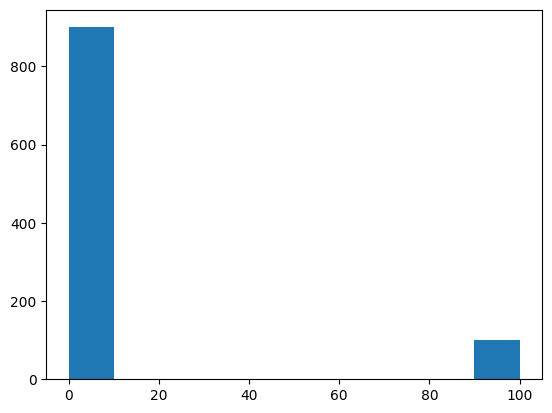

In [3]:
bucket_sizes = []
for _ in range(100):
	A = [round(random.uniform(0,2), 2) for _ in range(100)]
	_, bsize = bucket_sort(A)
	bucket_sizes += bsize
#Plots the bucket size distribution.
import matplotlib.pyplot as plt

plt.hist(bucket_sizes)

In [4]:
# Bucket sort for an input array with numbers greater than 1

def bucketSort1(A, NumOfBuckets=10):
    max_A = max(A)
    min_A = min(A)
  
    # range (for buckets)
    range_A = (max_A - min_A) / NumOfBuckets
  
    bucket = []
  
    # create empty buckets
    for i in range(NumOfBuckets):
        bucket.append([])
  
    # scatter the array elements into the correct bucket
    for i in range(len(A)):
        diff = (A[i] - min_A) / range_A - int((A[i] - min_A) / range_A)
  
        # append the boundary elements to the lower array
        if (diff == 0 and A[i] != min_A): # boundary
            bucket[int((A[i] - min_A) / range_A) - 1].append(A[i])
        else:
            bucket[int((A[i] - min_A) / range_A)].append(A[i])
    
    #print("Distribution of numbers in buckets")
    #for i in range(NumOfBuckets):
    #    print(bucket[i])
  
    # Sort each bucket individually
    for i in range(len(bucket)):
        if len(bucket[i]) != 0:
            bucket[i].sort()
            # Gather sorted elements 
    
    bucket_size = [len(bucket[i]) for i in range(NumOfBuckets)]
    
    # to the original array
    k = 0
    for list in bucket:
        if list:
            for x in list:
                A[k] = x
                k += 1

    return A, bucket_size

In [6]:
bucket_sizes1 = []
for _ in range(100):
	A = [round(random.uniform(0,2), 2) for _ in range(100)]
	_, bsize = bucketSort(A)
    _, bsize1 = bucketSort1(A)
	bucket_sizes1 += bsize
#Plots the bucket size distribution.
import matplotlib.pyplot as plt

plt.hist(bucket_sizes1)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In [ ]:
bucket_sizes1 = []
bucket_sizes = []
for _ in range(1):
    A = [round(random.uniform(0,2), 2) for _ in range(100)]
    _, bsize = bucket_sort(A)
    _, bsize1 = bucketSort1(A)
    bucket_sizes1 += bsize1
    bucket_sizes += bsize
#Plots the bucket size distribution.
import matplotlib.pyplot as plt
plt.hist(bucket_sizes, bins=10)
plt.hist(bucket_sizes1)
